# Logistic Regression With More Training Examples

In our previous notebook, Logistic Regression with balanced class weight did the best using TFIDF with ngram(1, 3)

In this notebook we will increase the number of examples to see if our model performs better

# Conslusion

* Increasing the number of samples did improve the model performance. 
* There was about a 3% improvement with 200k samples compared to 50k samples
* There was a steeper increase been 50k to 100k samples than 100k to 200k samples suggesting that there might be a plateau where increasing our sample size may not help our model improve

In [11]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import importlib
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import util.model_util as mu
import util.report_util as ru
import util.plot_util as pu

%matplotlib inline
sns.set()

CONFIG_DIR = "../config"
CONFIG_FILE = f'{CONFIG_DIR}/2019-11-run_classifiers-lrb.csv'
REPORT_DIR = "../reports"
REPORT_FILE_PREV = f'{REPORT_DIR}/2019-11-01-run_classifiers-50k-report.csv'
REPORT_FILE = f'{REPORT_DIR}/2019-11-run_classifiers-lrb-report.csv'

## Running Our Model

Jupyter notebook was not stable for me when running models for some reason. So I created a program that takes in configuration files and runs all models serially.

To run this again, execute the following command in the tools directory:

```
python run_classifiers.py ../config/2019-11-run_classifiers-lrb.csv
```

In [2]:
config = pd.read_csv(CONFIG_FILE)
config

,data_dir,data_file,class_column,dtype,drop_columns,model_name,max_iter,sampling,status,status_date,message
0,../dataset/feature_files,review_body-tfidf-df_none-ngram13-99567-4000-n...,star_rating,NaN,"helpful_votes, total_votes, helpful_product",LRB,100,NaN,success,2019-11-05 13:47:44,NaN
1,../dataset/feature_files,review_body-tfidf-df_none-ngram13-199134-4000-...,star_rating,NaN,"helpful_votes, total_votes, helpful_product",LRB,100,NaN,success,2019-11-05 13:59:09,NaN


# Load our Report

In [13]:
# best model from our previous report
report = ru.load_best_from_report(REPORT_FILE_PREV)
# add our current report
report = report.append(ru.load_report(REPORT_FILE)).astype({"sample_size": np.int32})

# Training Time

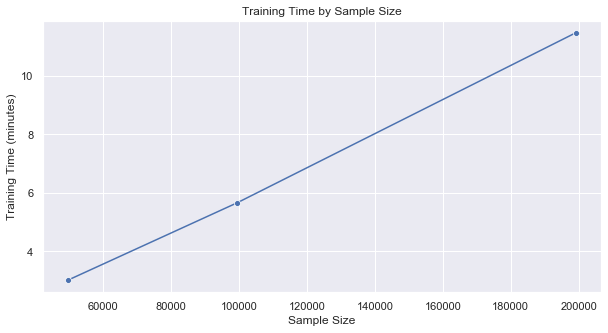

In [15]:
report.total_time_min = report.train_time_min + report.predict_time_min
report = report.sort_values("sample_size")

f, a = plt.subplots(1, 1, figsize=(10, 5))
sns.lineplot(data = report, x = "sample_size", y = "total_time_min", sort=False, marker="o")
_ = plt.title("Training Time by Sample Size")
_ = plt.xlabel("Sample Size")
_ = plt.ylabel("Training Time (minutes)")

# Results

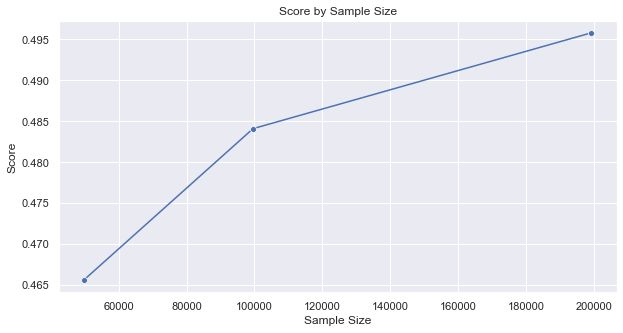

In [18]:
f, a = plt.subplots(1, 1, figsize=(10, 5))

sns.lineplot(data = report, x = "sample_size", y = "eval_metric", sort=False, marker="o")
_ = plt.title("Score by Sample Size")
_ = plt.xlabel("Sample Size")
_ = plt.ylabel("Score")